# Denver  2017 B-cycle Trip Data Exploration

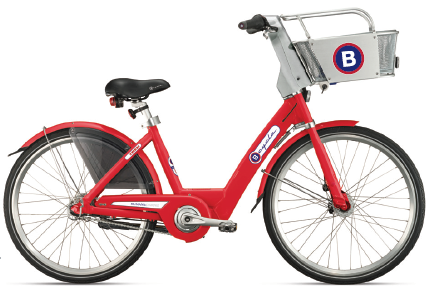

In [1]:
from IPython.display import Image
image = Image('figures/DenverBike.png')
image
# Source: http://denver.bcycle.com/docs/librariesprovider34/default-document-library/dbs_annualreport_2016_05.pdf

## 1. Introduction

[Denver B-cycle](https://denver.bcycle.com/) is a non-profit public bike sharing organization operating an automated bike sharing system called Denver B-cycle. Its mission is to "serve as a catalyst to fundamentally transform public thinking and behavior by operating a bike sharing system in Denver to enhance mobility while promoting all aspects of sustainability: quality of life, equity, the environment, economic development, and public health"  its purpose, its organization and discuss its relevance to this exploration.


Denver B-cycle posts its trips data set on its website as soon as its annual report is released. Trips data is available going back to 2011.

## 2. The Datasets

The dataset is in an Excel .xlsx format and is a 23.2MB file. The Kiosk Information file is only 19KB in size. Because of the dataset's large filesize, it was necessary to load it from the website at http://denver.bcycle.com/docs/librariesprovider34/default-document-library/annual-reports/denverbcycletripdata_2017_public.xlsx?sfvrsn=6b5321c5_2 and compress it so that it could be uploaded to the GitHub repository.

In [1]:
# import necessary libraries and modules
import pandas as pd
import numpy as np
from numpy import datetime64
import csv
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [3]:
# taken from Brandon Rhodes's Pandas Tutorial (https://github.com/brandon-rhodes)
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
# read converted csv compressed file from Excel xlsx. Bike_Number has mixed data types,
# so it needs to be declared as an object
dF = pd.read_csv("data/Denver_2017_Bike_Share_Trip_Data.gz", dtype = {'Bike_Number' : object}, compression="gzip")

### Trips dataframe data structure

Trips dataframe has 12 columns, two int64 and 10 object data types. The column names were updated in 
Denver_2017_Bike_Share_Excel_to_CSV_File_Conversion.ipynb
The original columns in the Excel file were ["User's Program", "User ID", "Membership Type", "Bike", "Checkout Date",
"Checkout Time", "Checkout Kiosk", "Bike Checkout Method", "Return Date", "Return Time", "Return Kiosk", "Duration (Minutes)"]

In [5]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344256 entries, 0 to 344255
Data columns (total 12 columns):
User_Program       344256 non-null object
User_ID            344256 non-null int64
Membership_Type    344256 non-null object
Bike_Number        344256 non-null object
Checkout_Date      344256 non-null object
Checkout_Time      344256 non-null object
Checkout_Kiosk     344256 non-null object
Checkout_Method    344256 non-null object
Return_Date        344256 non-null object
Return_Time        344256 non-null object
Return_Kiosk       344256 non-null object
Trip_Duration      344256 non-null int64
dtypes: int64(2), object(10)
memory usage: 31.5+ MB


### Estimated number of trips = 344,256

In [6]:
# main dataframe has 344,256 rows of data
dF.shape

(344256, 12)

### Remove rows with NULL values in ANY column

In [7]:
dF.isnull().values.any()

False

In [8]:
dF.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration
0,Denver B-cycle,1478826,24 hour online (Denver B-cycle),324,2017-01-01,09:39:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,28
1,Denver B-cycle,1478830,24 hour online (Denver B-cycle),784,2017-01-01,09:40:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,27
2,Denver B-cycle,1478830,24 hour online (Denver B-cycle),948,2017-01-01,11:36:00,32nd & Pecos,Mobile,2017-01-01,11:46:00,29th & Zuni,10


### Convert Checkout_Date and Return_Date columns to DateTime64 datatype

In [9]:
dF['Checkout_Date'] = pd.to_datetime(dF['Checkout_Date'])
dF['Return_Date'] = pd.to_datetime(dF['Return_Date'])

In [10]:
dF.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration
0,Denver B-cycle,1478826,24 hour online (Denver B-cycle),324,2017-01-01,09:39:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,28
1,Denver B-cycle,1478830,24 hour online (Denver B-cycle),784,2017-01-01,09:40:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,27
2,Denver B-cycle,1478830,24 hour online (Denver B-cycle),948,2017-01-01,11:36:00,32nd & Pecos,Mobile,2017-01-01,11:46:00,29th & Zuni,10


## 3. Data Wrangling

### Filtering the main dataframe to obtain actual miles ridden

### Checkouts Per Membership Type

In [11]:
# Checkouts by Membership Type
membership = dF.groupby('Membership_Type').size().sort_values(ascending=False)

In [12]:
membership.head(10)

Membership_Type
24-hour Kiosk Only (Denver B-cycle)          103471
Annual Plus (Denver B-cycle)                  77500
Annual (Denver B-cycle)                       76601
Monthly (Denver B-cycle)                      60462
Republic Rider (Annual) (Boulder B-cycle)      7229
24 HR (Denver B-cycle)                         5873
Denver B-cycle Founder (Denver B-cycle)        4891
Flex Pass (Denver B-cycle)                     3868
24 hour online (Denver B-cycle)                2250
24 HR Rental (Denver B-cycle)                   652
dtype: int64

In [13]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
IPython_default = plt.rcParams.copy()
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

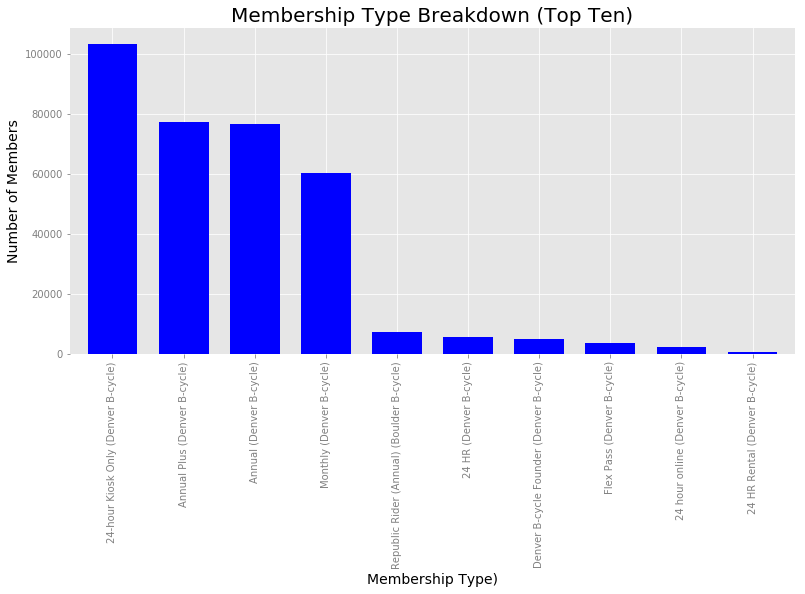

In [14]:
# plot the results
ax = dF.groupby('Membership_Type').size().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title('Membership Type Breakdown (Top Ten)', fontsize = 20)
plt.xlabel('Membership Type)', fontsize = 14)
plt.ylabel('Number of Members', fontsize = 14)
plt.show()

### Keep a copy of the dataframe for use in Regression studies

In [15]:
dML = dF.copy(deep = True)

### Estimated number of trips = 339,424

In [16]:
# cannot use Trip Duration = 0 to count toward total distance ridden
dF = dF[dF.Trip_Duration != 0]

In [17]:
dF.shape

(344256, 12)

In [18]:
# Check to see number of trips made with 1 minute
tripDurOne = dF[(dF["Checkout_Kiosk"] == dF["Return_Kiosk"]) & (dF["Trip_Duration"] == 1)]
tripDurOne.shape

(4029, 12)

In [19]:
# Check to see number of trips made with 15 minutes or less
dX = dF[(dF["Checkout_Kiosk"] == dF["Return_Kiosk"]) & (dF["Trip_Duration"] < 16)]
dX.shape

(9399, 12)

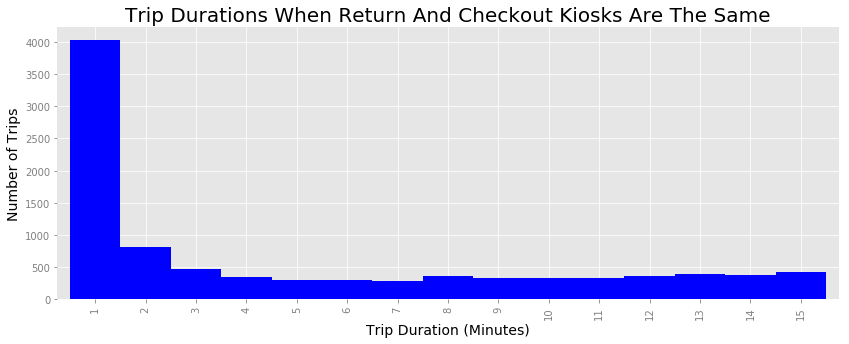

In [20]:
# plot the results
ax = dX.groupby('Trip_Duration').size().plot(kind='bar', figsize=(14,5), color='blue', width=1.0, xlim=(0,16))
plt.title('Trip Durations When Return And Checkout Kiosks Are The Same', fontsize = 20)
plt.xlabel('Trip Duration (Minutes)', fontsize = 14)
plt.ylabel('Number of Trips', fontsize = 14)
plt.show()

### Estimated Trips = 339,424

In [21]:
# remove rows that have a trip duration of 1 minute
dF.drop(dF[dF['Trip_Duration'] == 1].index, inplace = True)

In [22]:
# main dataframe has 339,424 rows to work with
dF.shape

(339424, 12)

### Load Kiosk public data, modify column names

The Kiosk Excel file has names, addresses and geopgraphical coordinates of the 89 Checkout and Return Kiosks. This file needs to be prepared for use with additional code to retrieve distances between Kiosks using the Google Distance Matrix API obtained via its site: (https://developers.google.com/maps/documentation/javascript/examples/distance-matrix). This service requires the user to obtain a key that is used to retrieve up to a maximum of 2500 calls per day.

In [23]:
# read in Kiosk information from the Denver Bike Share public data site
dK= pd.read_csv("data/Denver_2017_Bike_Share_Kiosks_Info.gz", compression="gzip")

In [24]:
dK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
Checkout_Kiosk              90 non-null object
Checkout_Kiosk_Latitude     90 non-null float64
Checkout_Kiosk_Longitude    90 non-null float64
Return_Kiosk                90 non-null object
Return_Kiosk_Latitude       90 non-null float64
Return_Kiosk_Longitude      90 non-null float64
dtypes: float64(4), object(2)
memory usage: 4.3+ KB


In [25]:
dK.shape

(90, 6)

In [26]:
dK.head()

,Checkout_Kiosk,Checkout_Kiosk_Latitude,Checkout_Kiosk_Longitude,Return_Kiosk,Return_Kiosk_Latitude,Return_Kiosk_Longitude
0,10th & Osage,39.732,-105.005,10th & Osage,39.732,-105.005
1,11th & Broadway,39.734,-104.988,11th & Broadway,39.734,-104.988
2,11th & Delaware,39.734,-104.993,11th & Delaware,39.734,-104.993
3,11th & Emerson,39.734,-104.976,11th & Emerson,39.734,-104.976
4,11th & Ogden,39.734,-104.976,11th & Ogden,39.734,-104.976


### Save Kiosk data for use with Google Distance Matrix API

File is ready for use with additional python/pandas code (Denver_2017_Bike_Share_Distance_Duration_Submit.py) to retrieve distances between Kiosks using the Google Distance Matrix API. The retrieved distances are saved in (Denver_2017_Bike_Share_Kiosks_Distances_Durations.csv).

### Retrieve Kiosk distances and add Kiosks that have the same starting and ending trip information

File is ready for merging with the Trips dataframe in order to calculate the total miles ridden. But prior to this, 89 more data rows where the Checkout Kiosk and the Return Kiosk are the same have to added to the retrieved file that has distances retrieved from Google. These 89 rows will have the Trip_Distance column reporting zeros but there could be bikes rented from the Checkout Kiosk and returned to it which is considered valid data.

In [27]:
# read in distance information retrieved from Google Distance API
dD = pd.read_csv('data/Denver_2017_Bike_Share_Kiosks_Distances_Durations.csv')

In [28]:
# Drop columns that are not relevant for merging with the Trips dataframe
dD.drop(['Checkout_Kiosk_Latitude', 'Checkout_Kiosk_Longitude', 'Return_Kiosk_Latitude', 'Return_Kiosk_Longitude',
         'Distance_Checkout_Return', 'Duration_Checkout_Return', 'Distance_Return_Checkout',
         'Duration_Return_Checkout', 'Average_Duration'], axis = 1, inplace = True)

In [29]:
dD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 3 columns):
Checkout_Kiosk      8010 non-null object
Return_Kiosk        8010 non-null object
Average_Distance    8010 non-null float64
dtypes: float64(1), object(2)
memory usage: 187.8+ KB


In [30]:
# read csv file for use
dCR = pd.read_csv("data/Denver_2017_Bike_Share_Kiosks_Info.gz", compression="gzip")

In [31]:
# Drop columns that are not relevant for merging with the Trips dataframe
dCR.drop(['Checkout_Kiosk_Latitude', 'Checkout_Kiosk_Longitude', 'Return_Kiosk_Latitude', 'Return_Kiosk_Longitude'], 
         axis = 1, inplace = True)

In [32]:
dCR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
Checkout_Kiosk    90 non-null object
Return_Kiosk      90 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [33]:
# add Average_Distance column and fill with zeros
dCR['Average_Distance'] = 0

In [34]:
dCR.head(3)

,Checkout_Kiosk,Return_Kiosk,Average_Distance
0,10th & Osage,10th & Osage,0
1,11th & Broadway,11th & Broadway,0
2,11th & Delaware,11th & Delaware,0


In [35]:
# add these rows to the retrieved distances dataframe
dK = pd.concat([dD, dCR], axis = 0)

In [36]:
# A combination of 90 Checkout and Return Kiosks should give a value of 8100
dK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8100 entries, 0 to 89
Data columns (total 3 columns):
Checkout_Kiosk      8100 non-null object
Return_Kiosk        8100 non-null object
Average_Distance    8100 non-null float64
dtypes: float64(1), object(2)
memory usage: 253.1+ KB


### Merge with Trips dataframe and remove invalid rows

In [37]:
# trips dataframe
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339424 entries, 0 to 344255
Data columns (total 12 columns):
User_Program       339424 non-null object
User_ID            339424 non-null int64
Membership_Type    339424 non-null object
Bike_Number        339424 non-null object
Checkout_Date      339424 non-null datetime64[ns]
Checkout_Time      339424 non-null object
Checkout_Kiosk     339424 non-null object
Checkout_Method    339424 non-null object
Return_Date        339424 non-null datetime64[ns]
Return_Time        339424 non-null object
Return_Kiosk       339424 non-null object
Trip_Duration      339424 non-null int64
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 33.7+ MB


In [38]:
# merge distance information retrieved from Google Distance API with Trips dataframe
dF = pd.merge(dF, dK, how='left', left_on=['Checkout_Kiosk', 'Return_Kiosk'], right_on=['Checkout_Kiosk', 'Return_Kiosk'])

In [39]:
# Trips dataframe now has 409539 rows, an increase of 43 rows (409539-409496), possibly due to invalid stations
# and the Average_Distance column shows only 402965 rows of valid data
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339424 entries, 0 to 339423
Data columns (total 13 columns):
User_Program        339424 non-null object
User_ID             339424 non-null int64
Membership_Type     339424 non-null object
Bike_Number         339424 non-null object
Checkout_Date       339424 non-null datetime64[ns]
Checkout_Time       339424 non-null object
Checkout_Kiosk      339424 non-null object
Checkout_Method     339424 non-null object
Return_Date         339424 non-null datetime64[ns]
Return_Time         339424 non-null object
Return_Kiosk        339424 non-null object
Trip_Duration       339424 non-null int64
Average_Distance    322082 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 36.3+ MB


In [40]:
dF.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Average_Distance
0,Denver B-cycle,1478826,24 hour online (Denver B-cycle),324,2017-01-01,09:39:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,28,0.555
1,Denver B-cycle,1478830,24 hour online (Denver B-cycle),784,2017-01-01,09:40:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,27,0.555
2,Denver B-cycle,1478830,24 hour online (Denver B-cycle),948,2017-01-01,11:36:00,32nd & Pecos,Mobile,2017-01-01,11:46:00,29th & Zuni,10,0.745


In [41]:
# Check to confirm there are null values in the dataframe
dF.isnull().values.any()

True

In [42]:
# locate the rows with null data 
nan_rows = dF[dF.isnull().T.any().T]

In [43]:
nan_rows.shape

(17342, 13)

In [44]:
nan_rows.head()

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Average_Distance
145,Denver B-cycle,1038625,Annual Plus (Denver B-cycle),66,2017-01-01,12:53:00,18th & California,Rfid,2017-01-01,13:06:00,17th & Wewatta,13,nan
146,Denver B-cycle,485948,Annual Plus (Denver B-cycle),773,2017-01-01,12:56:00,17th & Larimer,Rfid,2017-01-02,18:53:00,DBS LARIMER WAREHOUSE,1797,nan
147,Denver B-cycle,485938,Annual Plus (Denver B-cycle),238,2017-01-01,12:56:00,17th & Larimer,Rfid,2017-01-02,19:04:00,DBS LARIMER WAREHOUSE,1808,nan
163,Denver B-cycle,799278,Annual Plus (Denver B-cycle),645,2017-01-01,15:46:00,Ellsworth & Madison,Rfid,2017-01-01,16:15:00,23rd & Clay,29,nan
175,Denver B-cycle,799278,Annual Plus (Denver B-cycle),645,2017-01-01,17:03:00,23rd & Clay,Rfid,2017-01-01,17:36:00,Ellsworth & Madison,33,nan


### Rows with invalid Kiosks = 17,342

In [45]:
# found 17,342 rows!!
nan_rows.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Average_Distance
145,Denver B-cycle,1038625,Annual Plus (Denver B-cycle),66,2017-01-01,12:53:00,18th & California,Rfid,2017-01-01,13:06:00,17th & Wewatta,13,nan
146,Denver B-cycle,485948,Annual Plus (Denver B-cycle),773,2017-01-01,12:56:00,17th & Larimer,Rfid,2017-01-02,18:53:00,DBS LARIMER WAREHOUSE,1797,nan
147,Denver B-cycle,485938,Annual Plus (Denver B-cycle),238,2017-01-01,12:56:00,17th & Larimer,Rfid,2017-01-02,19:04:00,DBS LARIMER WAREHOUSE,1808,nan


In [46]:
invalid_checkout_kiosks = nan_rows[~nan_rows.Checkout_Kiosk.isin(dCR.Checkout_Kiosk)]

In [47]:
invalid_checkout_kiosks.Checkout_Kiosk.unique()

array(['18th & California', 'Ellsworth & Madison', '13th & Pearl',
       'Market Street Station'], dtype=object)

In [48]:
invalid_return_kiosks = nan_rows[~nan_rows.Return_Kiosk.isin(dCR.Return_Kiosk)]

In [49]:
invalid_return_kiosks.Return_Kiosk.unique()

array(['DBS LARIMER WAREHOUSE', 'Ellsworth & Madison',
       '18th & California', '13th & Pearl', 'Market Street Station',
       'Dead and Missing Bikes', 'Display Bikes - Various Locations',
       'Colfax Marathon Bike Valet', 'TDNC', 'Gate 5',
       "Bronco's Bike Valet"], dtype=object)

In [50]:
# remove these 17,342 rows from the dataframe
dF = dF.drop(dF.index[nan_rows.index])

In [51]:
# Main dataframe now has 322,082 rows to work with
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322082 entries, 0 to 339423
Data columns (total 13 columns):
User_Program        322082 non-null object
User_ID             322082 non-null int64
Membership_Type     322082 non-null object
Bike_Number         322082 non-null object
Checkout_Date       322082 non-null datetime64[ns]
Checkout_Time       322082 non-null object
Checkout_Kiosk      322082 non-null object
Checkout_Method     322082 non-null object
Return_Date         322082 non-null datetime64[ns]
Return_Time         322082 non-null object
Return_Kiosk        322082 non-null object
Trip_Duration       322082 non-null int64
Average_Distance    322082 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 34.4+ MB


### Estimate Trip Distance for Kiosks that have the same starting and ending trip information

In [52]:
dF.rename(columns = {'Average_Distance' : 'Trip_Distance'}, inplace = True)

In [53]:
dF.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Trip_Distance
0,Denver B-cycle,1478826,24 hour online (Denver B-cycle),324,2017-01-01,09:39:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,28,0.555
1,Denver B-cycle,1478830,24 hour online (Denver B-cycle),784,2017-01-01,09:40:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,27,0.555
2,Denver B-cycle,1478830,24 hour online (Denver B-cycle),948,2017-01-01,11:36:00,32nd & Pecos,Mobile,2017-01-01,11:46:00,29th & Zuni,10,0.745


In [54]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322082 entries, 0 to 339423
Data columns (total 13 columns):
User_Program       322082 non-null object
User_ID            322082 non-null int64
Membership_Type    322082 non-null object
Bike_Number        322082 non-null object
Checkout_Date      322082 non-null datetime64[ns]
Checkout_Time      322082 non-null object
Checkout_Kiosk     322082 non-null object
Checkout_Method    322082 non-null object
Return_Date        322082 non-null datetime64[ns]
Return_Time        322082 non-null object
Return_Kiosk       322082 non-null object
Trip_Duration      322082 non-null int64
Trip_Distance      322082 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 34.4+ MB


In [55]:
# Valid data that needs to aggregated to total distance
# Checkout Kiosk == Return_Kiosk and Trip_Distance == 0
dD = dF[(dF["Checkout_Kiosk"] == dF["Return_Kiosk"]) & (dF["Trip_Distance"] == 0)]

In [56]:
# valid data rows = 24,281
dD.shape

(24281, 13)

In [57]:
dD.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Trip_Distance
4,Denver B-cycle,1478942,24 hour online (Denver B-cycle),649,2017-01-01,12:05:00,REI,Kiosk Credit Card Lookup,2017-01-01,12:08:00,REI,3,0.000
13,Denver B-cycle,1478838,24-hour Kiosk Only (Denver B-cycle),21,2017-01-01,09:46:00,12th & Sherman,New Kiosk Purchase,2017-01-01,11:25:00,12th & Sherman,99,0.000
14,Denver B-cycle,1478847,24-hour Kiosk Only (Denver B-cycle),627,2017-01-01,09:58:00,30th & Lawrence,New Kiosk Purchase,2017-01-01,10:05:00,30th & Lawrence,7,0.000


In [58]:
dD['Trip_Duration'].sum()

1421004

In [59]:
dF['Trip_Duration'].sum() - dD['Trip_Duration'].sum()

5707502

In [60]:
dF['Trip_Distance'].sum()

428855.94999999995

### Estimate average speed for use in Kiosks that have the same and ending trip infomation

In [61]:
avSpeed =  (dF['Trip_Distance'].sum()) /(dF['Trip_Duration'].sum() - dD['Trip_Duration'].sum())

In [62]:
avSpeed # miles/min

0.07513899250495225

In [63]:
dE = dD.copy(deep=True)

In [64]:
# Multiply the trip duration by average speed to get distance
dE['Trip_Distance'] = dE['Trip_Duration'].map(lambda x: x*avSpeed)

In [65]:
# drop columns that are not relevant to the merge with the Trips dataframe
dE.drop(dE.columns[[0,1,2,3,4,5,6,7,8,9,10,11]], axis=1, inplace=True)

In [66]:
dE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24281 entries, 4 to 339395
Data columns (total 1 columns):
Trip_Distance    24281 non-null float64
dtypes: float64(1)
memory usage: 379.4 KB


In [67]:
# merge the 31453 rows into the 409539 rows of the main dataframe
dF = pd.merge(dF, dE, how = 'left', left_index=True, right_index= True)

In [68]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322082 entries, 0 to 339423
Data columns (total 14 columns):
User_Program       322082 non-null object
User_ID            322082 non-null int64
Membership_Type    322082 non-null object
Bike_Number        322082 non-null object
Checkout_Date      322082 non-null datetime64[ns]
Checkout_Time      322082 non-null object
Checkout_Kiosk     322082 non-null object
Checkout_Method    322082 non-null object
Return_Date        322082 non-null datetime64[ns]
Return_Time        322082 non-null object
Return_Kiosk       322082 non-null object
Trip_Duration      322082 non-null int64
Trip_Distance_x    322082 non-null float64
Trip_Distance_y    24281 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 46.9+ MB


In [69]:
dF.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Trip_Distance_x,Trip_Distance_y
0,Denver B-cycle,1478826,24 hour online (Denver B-cycle),324,2017-01-01,09:39:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,28,0.555,nan
1,Denver B-cycle,1478830,24 hour online (Denver B-cycle),784,2017-01-01,09:40:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,27,0.555,nan
2,Denver B-cycle,1478830,24 hour online (Denver B-cycle),948,2017-01-01,11:36:00,32nd & Pecos,Mobile,2017-01-01,11:46:00,29th & Zuni,10,0.745,nan


In [70]:
# convert the NaN values to numeric and fill them with zeros
dF[['Trip_Distance_y']] = dF[['Trip_Distance_y']].apply(pd.to_numeric)
dF['Trip_Distance_y'].fillna(0, inplace=True)

In [71]:
# update the distance values in the main dataframe
dF['Trip_Distance'] = dF['Trip_Distance_x'] + dF['Trip_Distance_y']

In [72]:
dF.drop(['Trip_Distance_x'], axis = 1, inplace=True)

In [73]:
dF.drop(['Trip_Distance_y'], axis = 1, inplace=True)

In [74]:
totalDistance = dF['Trip_Distance'].sum()

### Distance Traveled = 535,629 miles

In [75]:
totalDistance

535628.7589055072

### Most Popular Checkout Kiosks

In [76]:
# Most popular Checkout Kiosks
mostPopular = dF.groupby('Checkout_Kiosk').size().sort_values(ascending=False)

In [77]:
mostPopular.head(10)

Checkout_Kiosk
16th & Wynkoop         12309
1350 Larimer            7724
13th & Speer            7722
1550 Glenarm            7643
16th & Platte           7258
18th & Arapahoe         6771
14th & Stout            6611
20th & Chestnut         6239
16th & Broadway         6227
16th & Little Raven     6025
dtype: int64

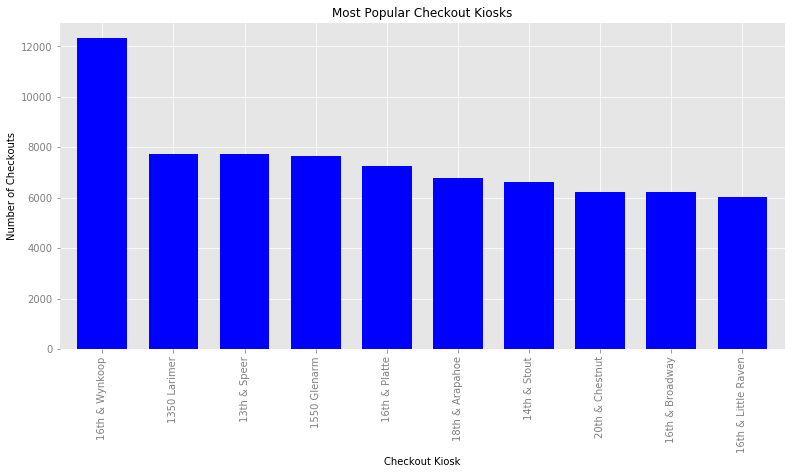

In [78]:
# plot the results
ax = dF.groupby('Checkout_Kiosk').size().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title("Most Popular Checkout Kiosks")
plt.xlabel('Checkout Kiosk')
plt.ylabel('Number of Checkouts')
plt.show()

### Map of Checkout Kiosk Popularity

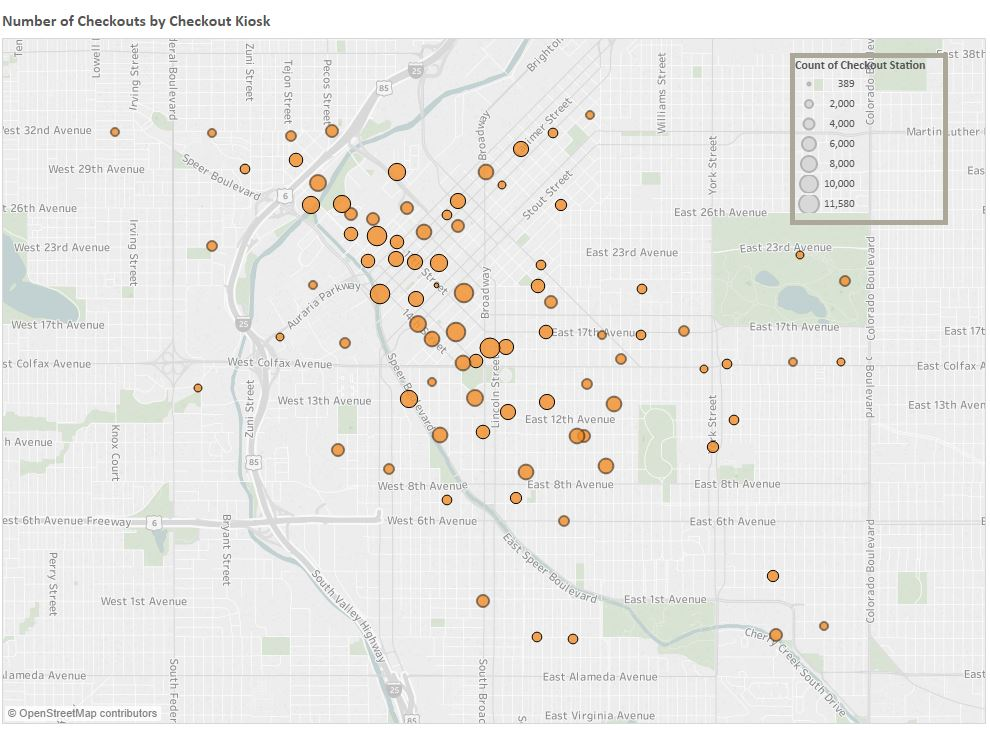

In [79]:
from IPython.display import Image
image = Image('figures/Checkouts_By_Checkout_Kiosk.jpg')
image

### Most Popular Return Kiosks

In [80]:
# Most popular Return Kiosks
mostPopular = dF.groupby('Return_Kiosk').size().sort_values(ascending=False)

In [81]:
mostPopular.head(10)

Return_Kiosk
16th & Wynkoop         14717
1350 Larimer            9502
1550 Glenarm            8412
16th & Platte           7881
13th & Speer            7411
16th & Broadway         7195
16th & Little Raven     7104
17th & Wewatta          6547
REI                     6422
18th & Arapahoe         6370
dtype: int64

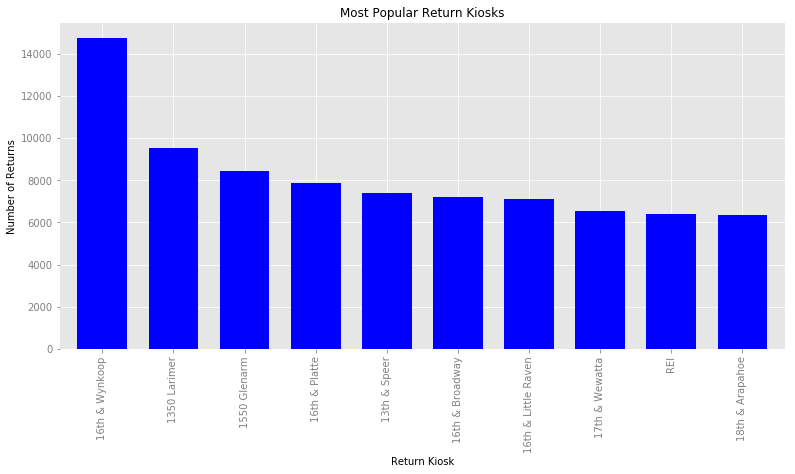

In [82]:
# plot the results
ax = dF.groupby('Return_Kiosk').size().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title("Most Popular Return Kiosks")
plt.xlabel('Return Kiosk')
plt.ylabel('Number of Returns')
plt.show()

### Map of Return Kiosk Popularity

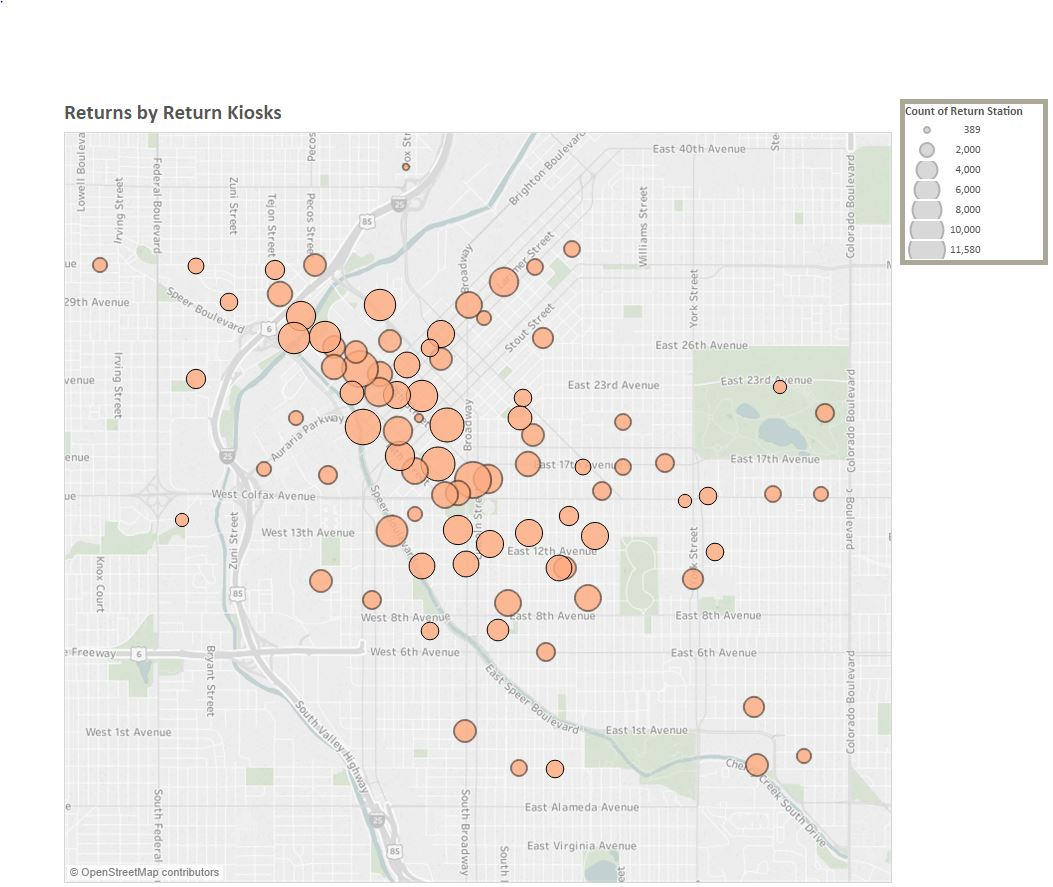

In [83]:
image = Image('figures/Returns_By_Return_Kiosks.jpg')
image

### Least Popular Checkout Kiosks

In [84]:
# Least popular Checkout Kiosks
leastPopular = dF.groupby('Checkout_Kiosk').size().sort_values(ascending=False)

In [85]:
leastPopular.tail(10)

Checkout_Kiosk
Colfax & Garfield     1566
33rd & Arapahoe       1488
14th & Elati          1455
Pepsi Center          1382
Colfax & Pearl        1327
4th & Walnut          1292
Colfax & Columbine    1154
39th & Fox             304
29th & Brighton        152
7th & Sherman           93
dtype: int64

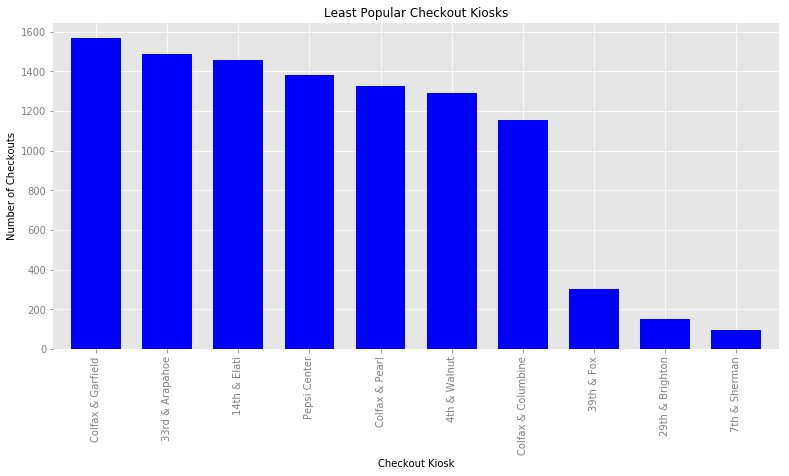

In [86]:
# plot the results
ax = dF.groupby('Checkout_Kiosk').size().sort_values(ascending=False).tail(10).plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title("Least Popular Checkout Kiosks")
plt.xlabel('Checkout Kiosk')
plt.ylabel('Number of Checkouts')
plt.show()

### Least Popular Return Kiosks

In [87]:
# Least popular Return Kiosks
leastPopular = dF.groupby('Return_Kiosk').size().sort_values(ascending=False)

In [88]:
leastPopular.tail(10)

Return_Kiosk
Colfax & Garfield     1446
14th & Elati          1403
32nd & Julian         1353
4th & Walnut          1286
Colfax & Pearl        1172
32nd & Clay            999
Colfax & Columbine     907
39th & Fox             316
29th & Brighton        204
7th & Sherman          120
dtype: int64

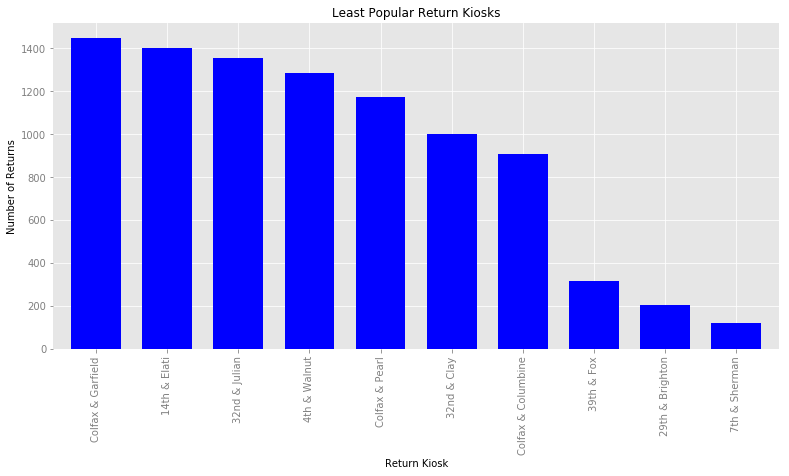

In [89]:
# plot the results
ax = dF.groupby('Return_Kiosk').size().sort_values(ascending=False).tail(10).plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title("Least Popular Return Kiosks")
plt.xlabel('Return Kiosk')
plt.ylabel('Number of Returns')
plt.show()

In [171]:
# Checkouts by Membership Type
checkout_method = dF.groupby('Checkout_Method').size().sort_values(ascending=False)

In [172]:
checkout_method.head(10)

Checkout_Method
Rfid                        169974
Kiosk Phone Lookup           59933
New Kiosk Purchase           45504
Kiosk Credit Card Lookup     36164
Mobile                       10503
Virtual                          4
dtype: int64

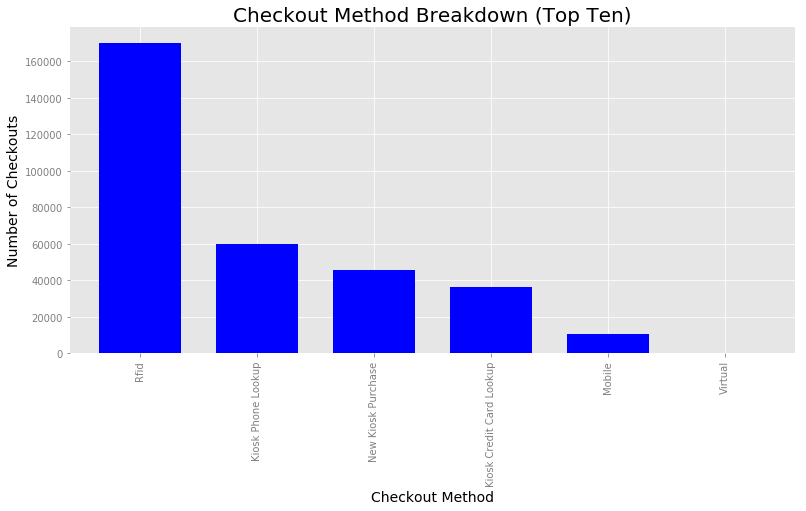

In [176]:
# plot the results
ax = dF.groupby('Checkout_Method').size().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title('Checkout Method Breakdown (Top Ten)', fontsize = 20)
plt.xlabel('Checkout Method', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

### Checkouts Per Membership Type

In [90]:
# Checkouts by Membership Type
membership = dF.groupby('Membership_Type').size().sort_values(ascending=False)

In [91]:
# there are 56250 rows with Membership = Not Applicable, a significant 14%
membership.head(10)

Membership_Type
24-hour Kiosk Only (Denver B-cycle)          96857
Annual Plus (Denver B-cycle)                 72715
Annual (Denver B-cycle)                      72456
Monthly (Denver B-cycle)                     55859
Republic Rider (Annual) (Boulder B-cycle)     6812
24 HR (Denver B-cycle)                        5579
Denver B-cycle Founder (Denver B-cycle)       4075
Flex Pass (Denver B-cycle)                    3657
24 hour online (Denver B-cycle)               2073
24 HR Rental (Denver B-cycle)                  617
dtype: int64

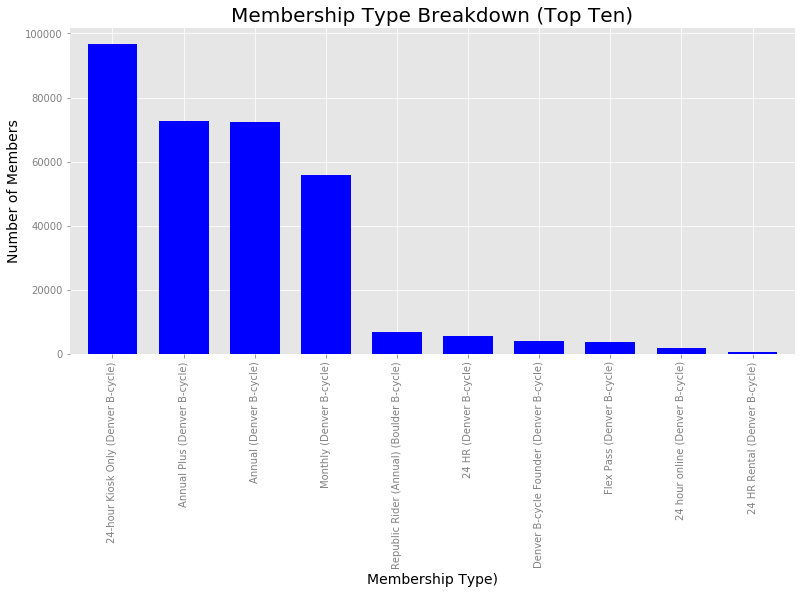

In [92]:
# plot the results
ax = dF.groupby('Membership_Type').size().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title('Membership Type Breakdown (Top Ten)', fontsize = 20)
plt.xlabel('Membership Type)', fontsize = 14)
plt.ylabel('Number of Members', fontsize = 14)
plt.show()

In [93]:
dF.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Time,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Trip_Distance
0,Denver B-cycle,1478826,24 hour online (Denver B-cycle),324,2017-01-01,09:39:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,28,0.555
1,Denver B-cycle,1478830,24 hour online (Denver B-cycle),784,2017-01-01,09:40:00,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,27,0.555
2,Denver B-cycle,1478830,24 hour online (Denver B-cycle),948,2017-01-01,11:36:00,32nd & Pecos,Mobile,2017-01-01,11:46:00,29th & Zuni,10,0.745


In [94]:
dF.rename(columns = {'Checkout_Time' : 'Checkout_Hour'}, inplace = True)

### Convert Checkout Time to Checkout_Hour

In [95]:
dF['Checkout_Hour'] = dF['Checkout_Hour'].map(lambda x: x[:2]).astype(int)

In [96]:
dF.head(3)

,User_Program,User_ID,Membership_Type,Bike_Number,Checkout_Date,Checkout_Hour,Checkout_Kiosk,Checkout_Method,Return_Date,Return_Time,Return_Kiosk,Trip_Duration,Trip_Distance
0,Denver B-cycle,1478826,24 hour online (Denver B-cycle),324,2017-01-01,9,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,28,0.555
1,Denver B-cycle,1478830,24 hour online (Denver B-cycle),784,2017-01-01,9,29th & Zuni,Mobile,2017-01-01,10:07:00,17th & Tejon,27,0.555
2,Denver B-cycle,1478830,24 hour online (Denver B-cycle),948,2017-01-01,11,32nd & Pecos,Mobile,2017-01-01,11:46:00,29th & Zuni,10,0.745


### Ridership by Calendar and Clock Variables

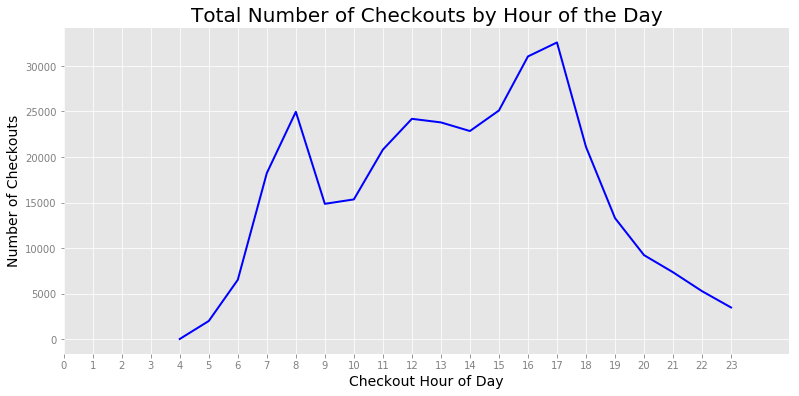

In [97]:
# plot the results
ax = dF.groupby('Checkout_Hour').size().plot(kind='line', figsize=(13,6), 
                color='blue', xlim=(0,25))
plt.title('Total Number of Checkouts by Hour of the Day', fontsize = 20)
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel('Checkout Hour of Day', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

In [98]:
dH = dF.groupby(['Checkout_Hour']).mean()

In [99]:
dH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 4 to 23
Data columns (total 3 columns):
User_ID          20 non-null float64
Trip_Duration    20 non-null float64
Trip_Distance    20 non-null float64
dtypes: float64(3)
memory usage: 640.0 bytes


In [100]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322082 entries, 0 to 339423
Data columns (total 13 columns):
User_Program       322082 non-null object
User_ID            322082 non-null int64
Membership_Type    322082 non-null object
Bike_Number        322082 non-null object
Checkout_Date      322082 non-null datetime64[ns]
Checkout_Hour      322082 non-null int32
Checkout_Kiosk     322082 non-null object
Checkout_Method    322082 non-null object
Return_Date        322082 non-null datetime64[ns]
Return_Time        322082 non-null object
Return_Kiosk       322082 non-null object
Trip_Duration      322082 non-null int64
Trip_Distance      322082 non-null float64
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(7)
memory usage: 33.2+ MB


In [101]:
dH.drop(['User_ID'], axis=1, inplace=True)

In [102]:
dH.head(25)

,Trip_Duration,Trip_Distance
Checkout_Hour,,
4,19.417,1.316
5,15.468,1.411
6,12.435,1.492
7,12.125,1.470
8,13.292,1.541
9,19.862,1.692
10,26.849,1.833
11,25.862,1.738
12,26.622,1.805


In [103]:
dH.drop(['Trip_Duration'], axis=1, inplace=True)

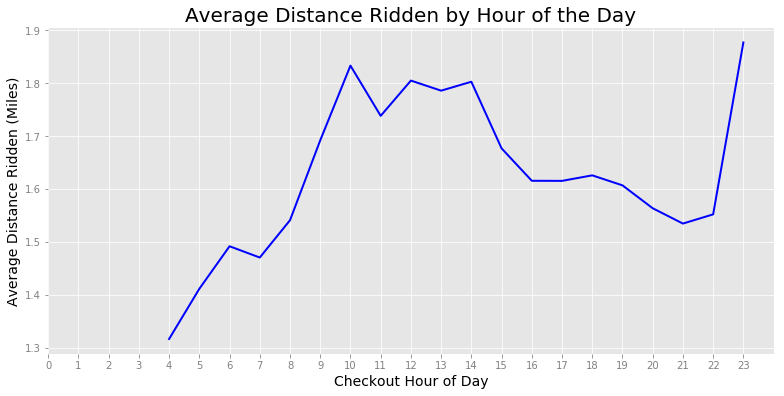

In [104]:
ax = dH.plot(kind='line', figsize=(13,6), 
                color='blue', xlim=(0,24))
plt.title('Average Distance Ridden by Hour of the Day', fontsize = 20)
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel('Checkout Hour of Day', fontsize = 14)
plt.ylabel('Average Distance Ridden (Miles)', fontsize = 14)
ax.legend().set_visible(False)
plt.show()

In [105]:
dH = dF.groupby(['Checkout_Hour']).mean()

In [106]:
# Drop columns that are not relevant
dH.drop(['User_ID', 'Trip_Distance'], axis = 1, inplace = True)

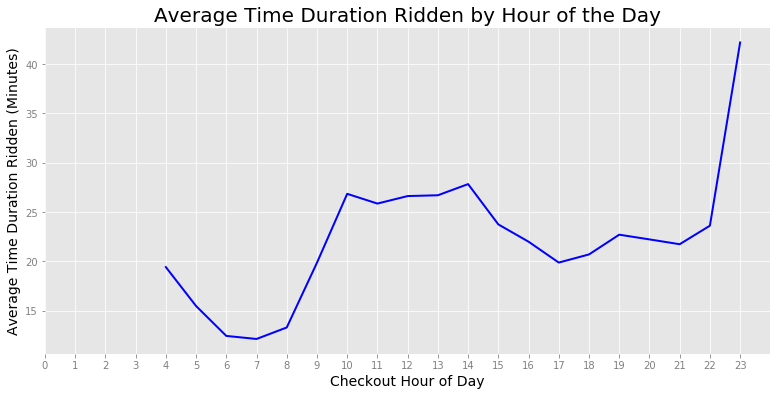

In [107]:
ax = dH.plot(kind='line', figsize=(13,6), 
                color='blue', xlim=(0,24))
plt.title('Average Time Duration Ridden by Hour of the Day', fontsize = 20)
plt.xlabel('Checkout Hour of Day', fontsize = 14)
plt.ylabel('Average Time Duration Ridden (Minutes)', fontsize = 14)
plt.xticks(np.arange(0, 24, 1.0))
ax.legend().set_visible(False)
plt.show()

In [108]:
checkout_hour_23 = dF[(dF["Checkout_Hour"] == 23)]

In [109]:
checkout_hour_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 115 to 339391
Data columns (total 13 columns):
User_Program       3480 non-null object
User_ID            3480 non-null int64
Membership_Type    3480 non-null object
Bike_Number        3480 non-null object
Checkout_Date      3480 non-null datetime64[ns]
Checkout_Hour      3480 non-null int32
Checkout_Kiosk     3480 non-null object
Checkout_Method    3480 non-null object
Return_Date        3480 non-null datetime64[ns]
Return_Time        3480 non-null object
Return_Kiosk       3480 non-null object
Trip_Duration      3480 non-null int64
Trip_Distance      3480 non-null float64
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(7)
memory usage: 367.0+ KB


In [110]:
# save csv file in preparation for use in the Machine Learning phase
checkout_hour_23.to_csv("data/Boulder_2017_Bike_Trip_23_Details.csv", index=False)

### Ridership by Hour and Weekday

#### Create Checkout_Weekday Column in Weather dataframe

In [111]:
# Create a new column called Checkout_WeekDay
dF['Checkout_WeekDay'] = pd.DatetimeIndex(dF['Checkout_Date']).weekday

In [112]:
dMon = dF.where(dF['Checkout_WeekDay'] == 0)
dTue = dF.where(dF['Checkout_WeekDay'] == 1)
dWed = dF.where(dF['Checkout_WeekDay'] == 2)
dThu = dF.where(dF['Checkout_WeekDay'] == 3)
dFri = dF.where(dF['Checkout_WeekDay'] == 4)
dSat = dF.where(dF['Checkout_WeekDay'] == 5)
dSun = dF.where(dF['Checkout_WeekDay'] == 6)

In [113]:
axMon = dMon.groupby('Checkout_Hour').size()
axTue = dTue.groupby('Checkout_Hour').size()
axWed = dWed.groupby('Checkout_Hour').size()
axThu = dThu.groupby('Checkout_Hour').size()
axFri = dFri.groupby('Checkout_Hour').size()
axSat = dSat.groupby('Checkout_Hour').size()
axSun = dSun.groupby('Checkout_Hour').size()

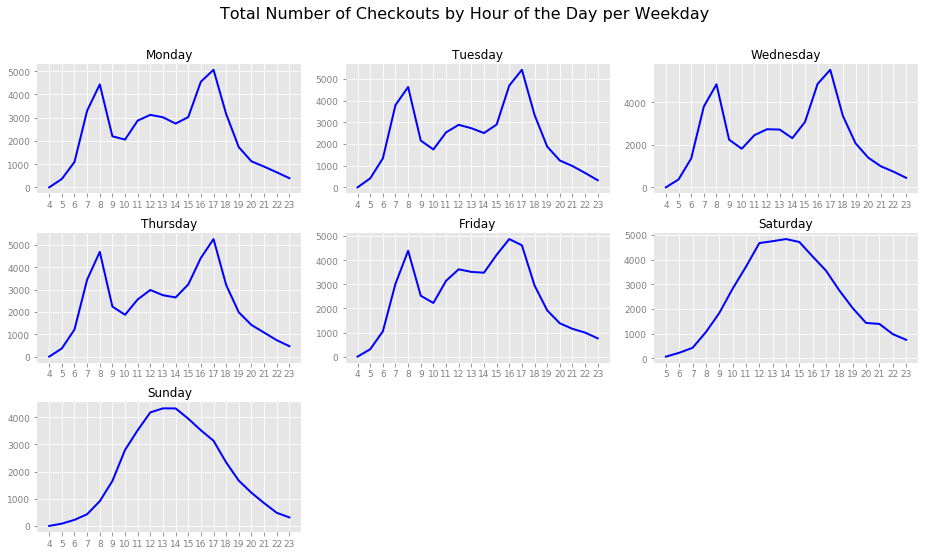

In [170]:
# plot the results
plt.figure()
plt.figure(figsize=(13,10))
plt.suptitle('Total Number of Checkouts by Hour of the Day per Weekday', fontsize=16)

plt.subplot(4,3,1)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xticks(np.arange(0, 24, 1.0))
plt.title('Monday', fontsize=12)
plt.plot(axMon,'b-')

plt.subplot(4,3,2)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xticks(np.arange(0, 24, 1.0))
plt.title('Tuesday', fontsize=12)
plt.plot(axTue,'b-')

plt.subplot(4,3,3)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xticks(np.arange(0, 24, 1.0))
plt.title('Wednesday', fontsize=12)
plt.plot(axWed,'b-')

plt.subplot(4,3,4)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xticks(np.arange(0, 24, 1.0))
plt.title('Thursday', fontsize=12)
plt.plot(axThu,'b-')

plt.subplot(4,3,5)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xticks(np.arange(0, 24, 1.0))
plt.title('Friday', fontsize=12)
plt.plot(axFri,'b-')

plt.subplot(4,3,6)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xticks(np.arange(0, 24, 1.0))
plt.title('Saturday', fontsize=12)
plt.plot(axSat,'b-')

plt.subplot(4,3,7)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xticks(np.arange(0, 24, 1.0))
plt.title('Sunday', fontsize=12)
plt.plot(axSun,'b-')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig = plt.gca()

### Ridership by Month

#### Create Checkout_Month column in Trips dataframe

In [115]:
# Create a new column called Checkout_Month
dF['Checkout_Month'] = pd.DatetimeIndex(dF['Checkout_Date']).month

In [116]:
dM = dF.groupby(['Checkout_Month'])

In [117]:
dM.size()

Checkout_Month
1     10406
2     16001
3     23813
4     24957
5     31267
6     37799
7     39098
8     39517
9     34636
10    27468
11    21915
12    15205
dtype: int64

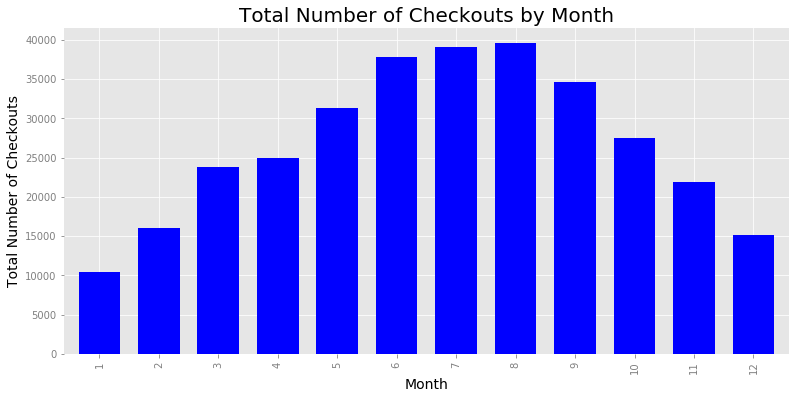

In [118]:
# plot the results
ax = dF.groupby('Checkout_Month').size().plot(kind='bar', figsize=(13,6), 
                color='blue', width=0.7, xlim=(0,15))
plt.title('Total Number of Checkouts by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Total Number of Checkouts', fontsize = 14)
plt.show()

## Merging with Weather

### Merge Daily Weather Data with Trips DataFrame

In [119]:
dW = pd.read_csv("data/Denver_2017_Bike_Share_Daily_Weather_Forecast.csv")

In [120]:
dW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
Date                      365 non-null object
cloudCover                365 non-null float64
apparentTemperatureMax    365 non-null float64
apparentTemperatureMin    365 non-null float64
temperatureMax            365 non-null float64
temperatureMin            365 non-null float64
windSpeed                 365 non-null float64
humidity                  365 non-null float64
visibility                365 non-null float64
dtypes: float64(8), object(1)
memory usage: 25.7+ KB


In [121]:
dW.head(3)

,Date,cloudCover,apparentTemperatureMax,apparentTemperatureMin,temperatureMax,temperatureMin,windSpeed,humidity,visibility
0,2017-01-01,0.170,40.980,15.110,43.350,22.520,2.820,0.530,9.930
1,2017-01-02,0.120,38.070,11.060,42.930,18.060,1.140,0.650,9.790
2,2017-01-03,0.260,25.800,4.040,25.800,12.690,1.070,0.780,8.000


In [122]:
dW.isnull().values.any()

False

In [123]:
dW['Date'] = pd.to_datetime(dW['Date'])

In [124]:
dW.sort_values(['Date'], inplace=True)

In [125]:
#dW.drop(['cloudCover', 'windSpeed', 'humidity'], axis = 1, inplace=True)

In [126]:
dF = pd.merge(dF, dW, how='left', left_on=['Checkout_Date'], right_on=['Date'])

In [127]:
dF.shape

(322082, 24)

In [128]:
dF.isnull().values.any()

False

In [129]:
dF.drop(['Date'], axis = 1, inplace = True)

In [130]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322082 entries, 0 to 322081
Data columns (total 23 columns):
User_Program              322082 non-null object
User_ID                   322082 non-null int64
Membership_Type           322082 non-null object
Bike_Number               322082 non-null object
Checkout_Date             322082 non-null datetime64[ns]
Checkout_Hour             322082 non-null int32
Checkout_Kiosk            322082 non-null object
Checkout_Method           322082 non-null object
Return_Date               322082 non-null datetime64[ns]
Return_Time               322082 non-null object
Return_Kiosk              322082 non-null object
Trip_Duration             322082 non-null int64
Trip_Distance             322082 non-null float64
Checkout_WeekDay          322082 non-null int64
Checkout_Month            322082 non-null int64
cloudCover                322082 non-null float64
apparentTemperatureMax    322082 non-null float64
apparentTemperatureMin    322082 non-null 

### Ridership by Day

Plot above shows temperature affects ridership. Daily temperatures in the 70s to 80s result in the highest ridership while temperatures 35F and below result in the lowest ridership. Also, ridership is high on weekends (Sunday, labeled as 6 and Saturday, labeled as 5) and during the months between May and June. Conversely, the winter months (December to February) have the lowest ridership unless the temperature is favorable on those days, which is typical of Colorado.

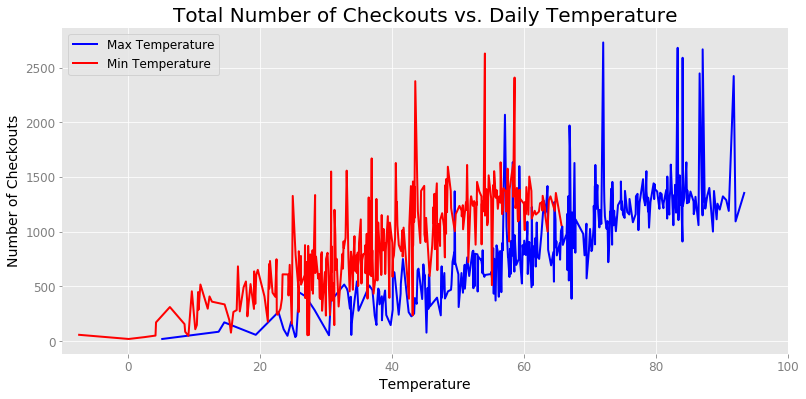

In [131]:
ax = dF.groupby('temperatureMax').size().plot(kind='line', figsize=(13,6), 
                color='blue', label='Max Temperature', fontsize=12, xlim=(-10,100))
ax = dF.groupby('temperatureMin').size().plot(kind='line', figsize=(13,6), 
                color='red', label='Min Temperature', fontsize=12, xlim=(-10,100))
plt.title('Total Number of Checkouts vs. Daily Temperature', fontsize = 20)
plt.xlabel('Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.legend(loc=2, fontsize='large')
plt.show()

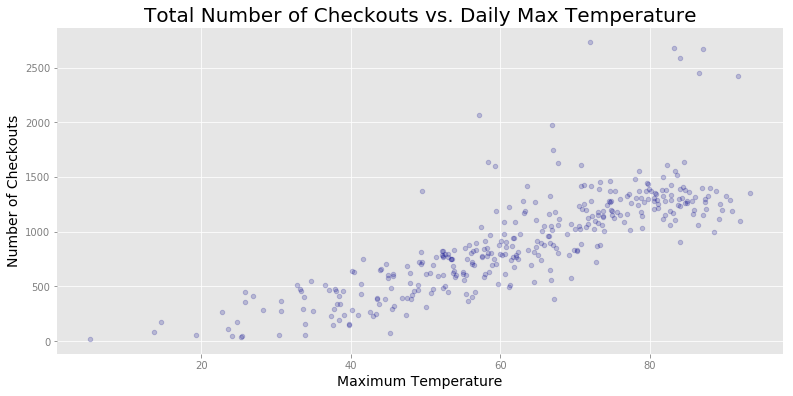

In [132]:
ax = dF.groupby(['temperatureMax']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='temperatureMax', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6), color='DarkBlue')
plt.title('Total Number of Checkouts vs. Daily Max Temperature', fontsize = 20)
plt.xlabel('Maximum Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

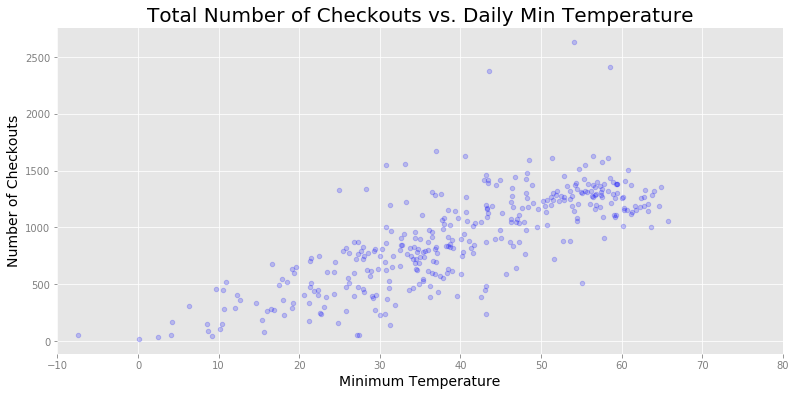

In [133]:
ax = dF.groupby(['temperatureMin']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='temperatureMin', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6),
        color='blue', xlim=(-10,80))
plt.title('Total Number of Checkouts vs. Daily Min Temperature', fontsize = 20)
plt.xlabel('Minimum Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

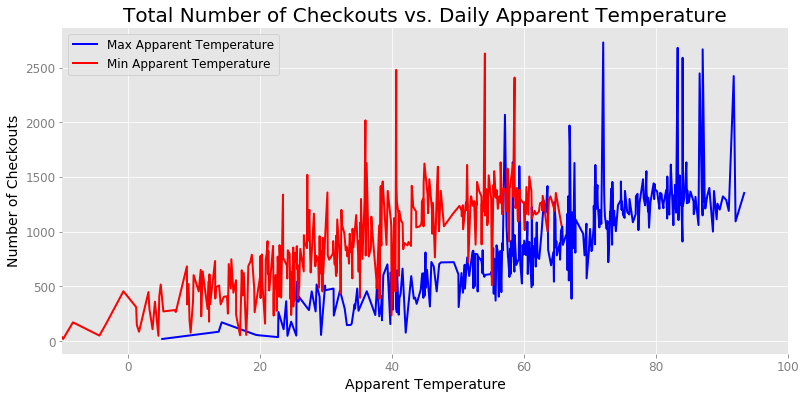

In [134]:
ax = dF.groupby('apparentTemperatureMax').size().plot(kind='line', figsize=(13,6), 
                color='blue', label='Max Apparent Temperature', fontsize=12, xlim=(-10,100))
ax = dF.groupby('apparentTemperatureMin').size().plot(kind='line', figsize=(13,6), 
                color='red', label='Min Apparent Temperature', fontsize=12, xlim=(-10,100))
plt.title('Total Number of Checkouts vs. Daily Apparent Temperature', fontsize = 20)
plt.xlabel('Apparent Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.legend(loc=2, fontsize='large')
plt.show()

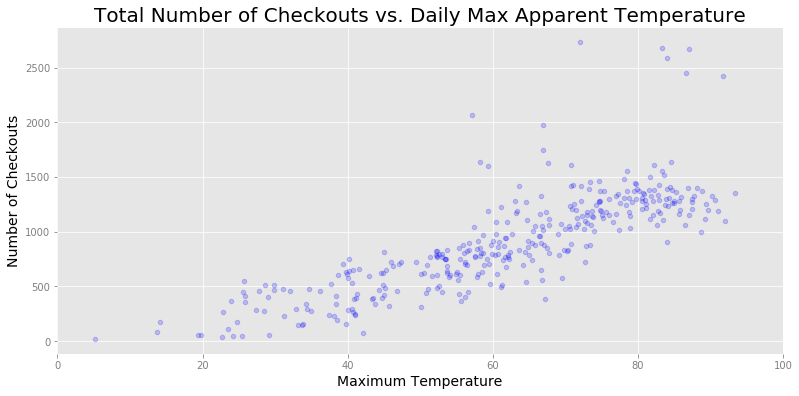

In [135]:
ax = dF.groupby(['apparentTemperatureMax']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='apparentTemperatureMax', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6),
        color='blue', xlim=(0,100))
plt.title('Total Number of Checkouts vs. Daily Max Apparent Temperature', fontsize = 20)
plt.xlabel('Maximum Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

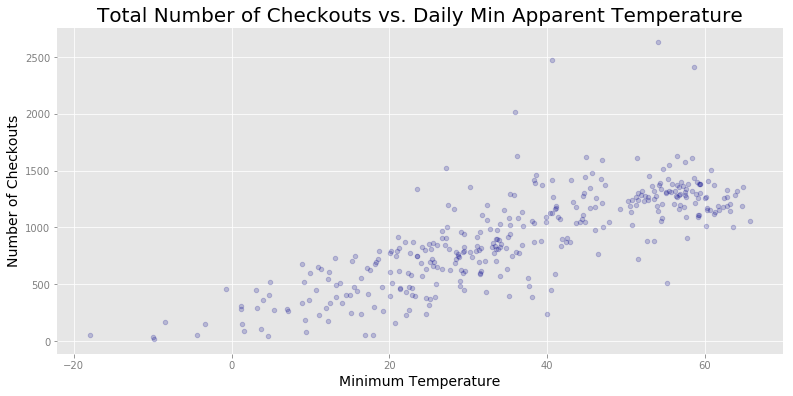

In [136]:
ax = dF.groupby(['apparentTemperatureMin']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='apparentTemperatureMin', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6), color='DarkBlue')
plt.title('Total Number of Checkouts vs. Daily Min Apparent Temperature', fontsize = 20)
plt.xlabel('Minimum Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

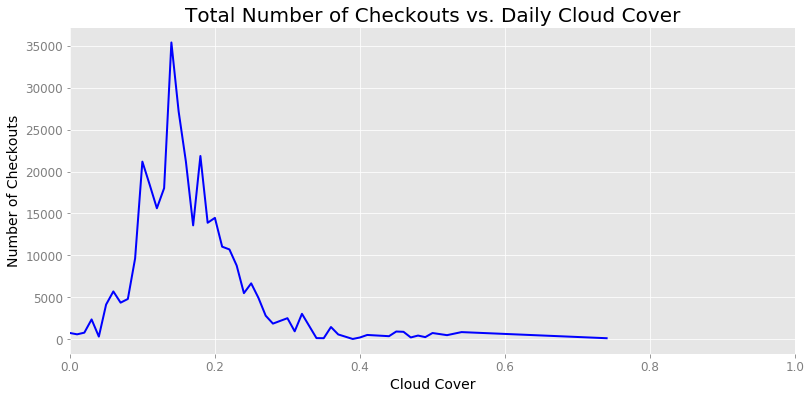

In [137]:
ax = dF.groupby('cloudCover').size().plot(kind='line', figsize=(13,6), 
                color='blue', fontsize=12, xlim=(0,1))
plt.title('Total Number of Checkouts vs. Daily Cloud Cover', fontsize = 20)
plt.xlabel('Cloud Cover', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

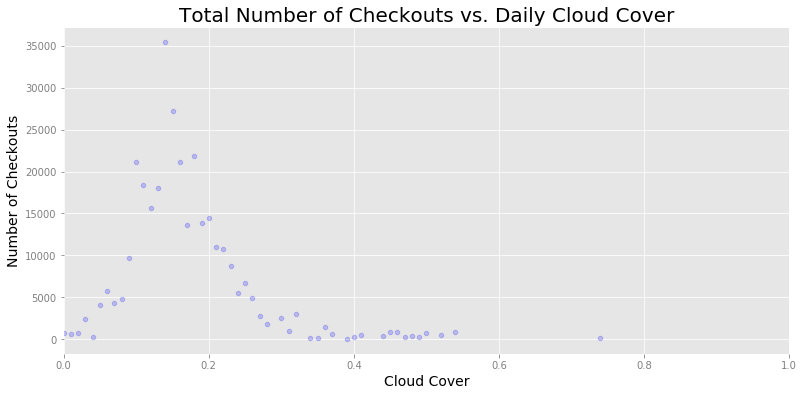

In [138]:
ax = dF.groupby(['cloudCover']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='cloudCover', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6),
        color='blue', xlim=(0,1))
plt.title('Total Number of Checkouts vs. Daily Cloud Cover', fontsize = 20)
plt.xlabel('Cloud Cover', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

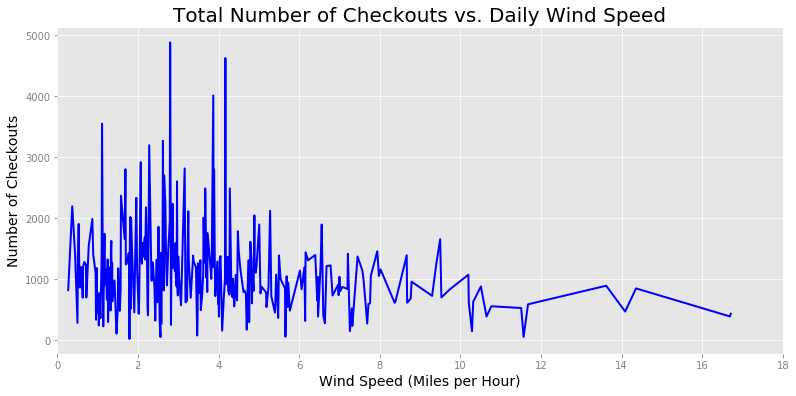

In [139]:
ax = dF.groupby('windSpeed').size().plot(kind='line', figsize=(13,6), 
                color='blue', xlim=(0,18))
plt.title('Total Number of Checkouts vs. Daily Wind Speed', fontsize = 20)
plt.xlabel('Wind Speed (Miles per Hour)', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

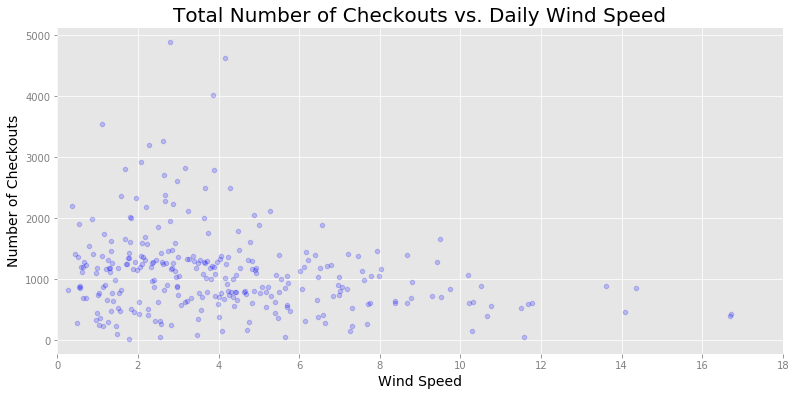

In [140]:
ax = dF.groupby(['windSpeed']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='windSpeed', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6),
        color='blue', xlim=(0,18))
plt.title('Total Number of Checkouts vs. Daily Wind Speed', fontsize = 20)
plt.xlabel('Wind Speed', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

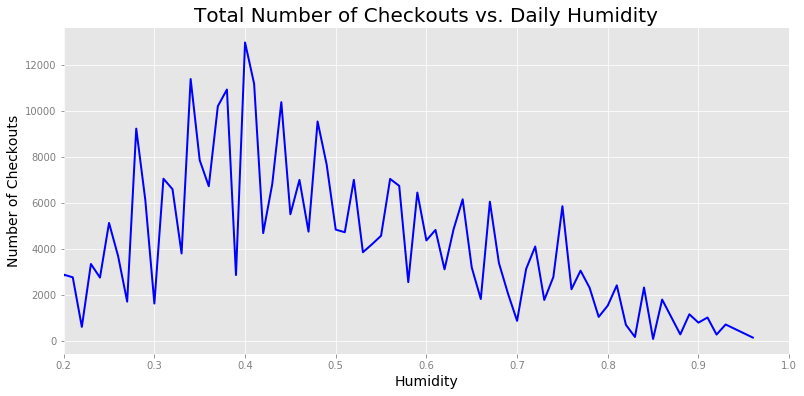

In [141]:
ax = dF.groupby('humidity').size().plot(kind='line', figsize=(13,6), 
                color='blue', xlim=(0.2,1))
plt.title('Total Number of Checkouts vs. Daily Humidity', fontsize = 20)
plt.xlabel('Humidity', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

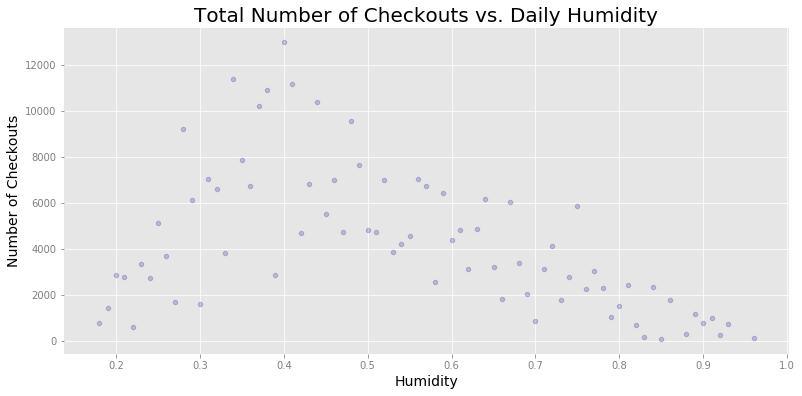

In [142]:
ax = dF.groupby(['humidity']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='humidity', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6), color='DarkBlue')
plt.title('Total Number of Checkouts vs. Daily Humidity', fontsize = 20)
plt.xlabel('Humidity', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

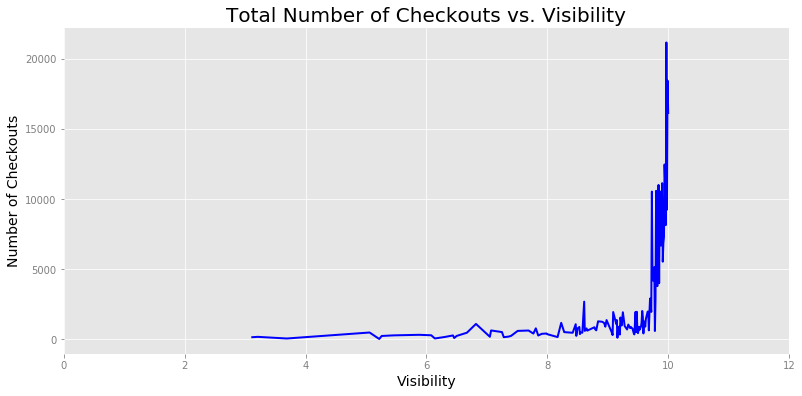

In [143]:
ax = dF.groupby('visibility').size().plot(kind='line', figsize=(13,6), 
                color='blue', xlim=(0,12))
plt.title('Total Number of Checkouts vs. Visibility', fontsize = 20)
plt.xlabel('Visibility', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

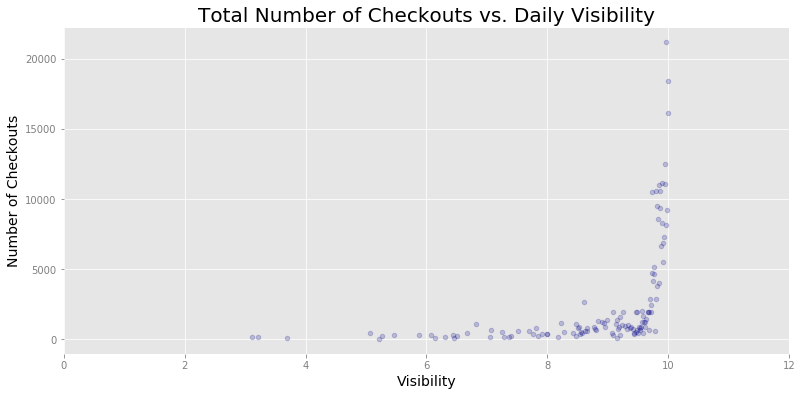

In [144]:
ax = dF.groupby(['visibility']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()
ax.plot(kind='scatter', x='visibility', y='Number_Of_Checkouts', alpha=0.2, figsize=(13,6), color='DarkBlue',
        xlim=(0,12))
plt.title('Total Number of Checkouts vs. Daily Visibility', fontsize = 20)
plt.xlabel('Visibility', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

In [145]:
dHRD = dF.groupby(['Checkout_WeekDay', 'Checkout_Date', 'temperatureMax', 'temperatureMin'])['Checkout_WeekDay']

In [146]:
dHRD.size().sort_values(ascending=False).head(10)

Checkout_WeekDay  Checkout_Date  temperatureMax  temperatureMin
0                 2017-07-03     84.630          56.460            1633
6                 2017-05-28     67.660          40.570            1627
4                 2017-09-01     82.270          58.350            1612
                  2017-06-30     70.830          51.380            1609
5                 2017-06-03     72.020          48.460            1593
                  2017-08-26     87.100          57.520            1575
4                 2017-08-18     83.370          54.080            1556
5                 2017-08-12     78.570          55.480            1552
4                 2017-08-25     83.620          54.650            1514
                  2017-07-07     81.740          60.810            1503
Name: Checkout_WeekDay, dtype: int64

In [147]:
dHRD.size().sort_values(ascending=False).tail(10)

Checkout_WeekDay  Checkout_Date  temperatureMax  temperatureMin
6                 2017-12-31     23.560          10.160            107
1                 2017-12-26     13.700          8.630              84
6                 2017-01-08     45.220          15.570             76
4                 2017-01-06     19.330          -7.450             56
0                 2017-01-16     33.820          27.400             55
5                 2017-04-29     30.440          27.190             52
                  2017-01-07     25.480          4.130              49
0                 2017-12-25     24.140          9.120              47
6                 2017-12-24     25.330          2.460              35
3                 2017-01-05     5.150           0.070              18
Name: Checkout_WeekDay, dtype: int64

In [148]:
dF.drop(['apparentTemperatureMax', 'apparentTemperatureMin', 'temperatureMax', 'temperatureMin',
         'cloudCover', 'humidity', 'windSpeed', 'visibility'], axis = 1, inplace = True)

### Merge Hourly Weather with Trips DataFrame

In [149]:
dW = pd.read_csv("data/Denver_2017_Bike_Share_Hourly_Weather_Forecast.csv")

In [150]:
dW.rename(columns = {'Hour': 'Checkout_Hour'}, inplace = True)

In [151]:
dW['Checkout_WeekDay'] = pd.DatetimeIndex(dW['Date']).weekday

In [152]:
dW['Checkout_Month'] = pd.DatetimeIndex(dW['Date']).month

In [153]:
dFW = dF.groupby(['Checkout_Date', 'Checkout_Month', 'Checkout_WeekDay', 
                  'Checkout_Hour']).size().to_frame(name = 'Number_Of_Checkouts').reset_index()

In [154]:
dW['Date'] = dW[['Date']].astype('datetime64[ns]')

In [155]:
dT = pd.merge(dW, dFW, how='left', left_on=['Date', 'Checkout_Hour'], 
              right_on=['Checkout_Date', 'Checkout_Hour'])

In [156]:
dT.isnull().values.any()

True

In [157]:
nan_rows = dT[dT.isnull().T.any().T]

In [158]:
dT = dT.drop(dT.index[nan_rows.index])

In [159]:
dT.isnull().values.any()

False

In [160]:
dT.drop(['Date', 'Checkout_WeekDay_y', 'Checkout_Month_y'], axis = 1, inplace = True)
dT.rename(columns = {'cloudCover': 'Cloud_Cover', 'temperature': 'Temperature', 'apparentTemperature' : 'Apparent_Temperature',
                     'windSpeed' : 'Wind_Speed', 'humidity' : 'Humidity', 'visibility' : 'Visibility',
                     'Checkout_WeekDay_x': 'Checkout_WeekDay', 'Checkout_Month_x': 'Checkout_Month'}, inplace = True)

In [161]:
dT = dT[['Checkout_Date', 'Checkout_Month', 'Checkout_WeekDay', 'Checkout_Hour', 'Temperature', 'Apparent_Temperature',
             'Cloud_Cover', 'Humidity', 'Wind_Speed', 'Visibility', 'Number_Of_Checkouts']]

### Checkouts vs. Hourly Temperature

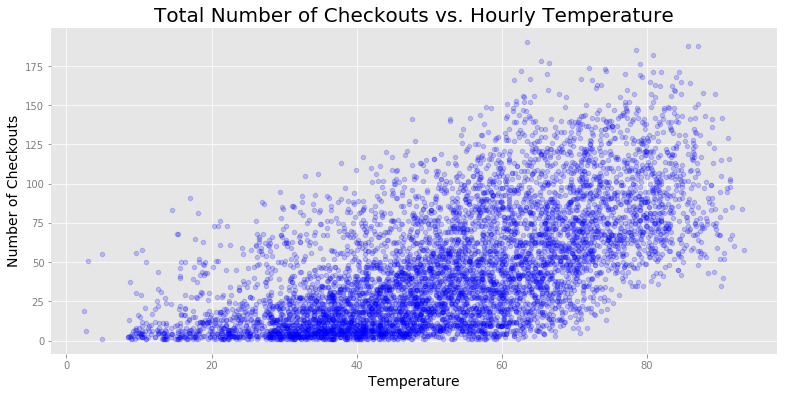

In [162]:
# Pandas scatter plot
dT.plot(kind='scatter', x='Temperature', y='Number_Of_Checkouts', alpha=0.2, color='blue', figsize=(13,6))
plt.title('Total Number of Checkouts vs. Hourly Temperature', fontsize = 20)
plt.xlabel('Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

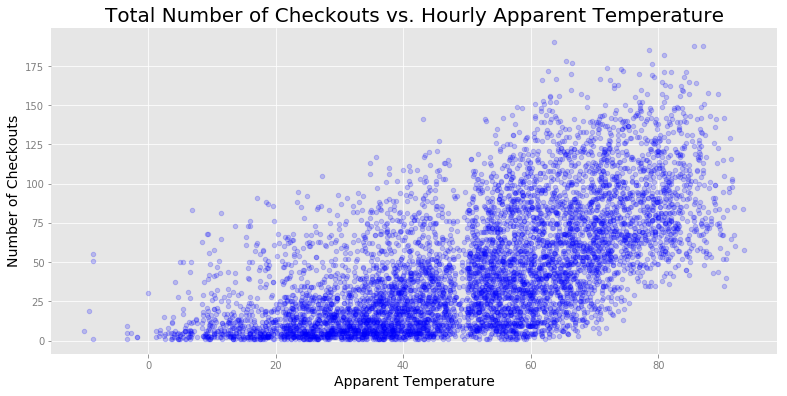

In [163]:
dT.plot(kind='scatter', x='Apparent_Temperature', y='Number_Of_Checkouts', alpha=0.2, color='blue', figsize=(13,6))
plt.title('Total Number of Checkouts vs. Hourly Apparent Temperature', fontsize = 20)
plt.xlabel('Apparent Temperature', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

### Checkouts vs. Hourly Humidity

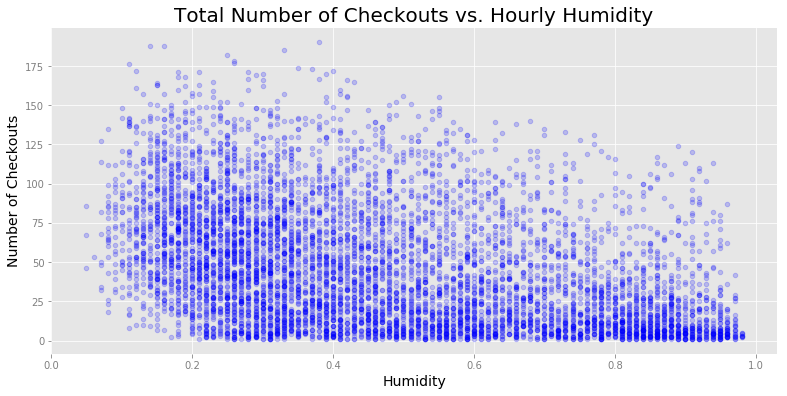

In [164]:
dT.plot(kind='scatter', x='Humidity', y='Number_Of_Checkouts', alpha=0.2, color='blue', figsize=(13,6))
plt.title('Total Number of Checkouts vs. Hourly Humidity', fontsize = 20)
plt.xlabel('Humidity', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

### Checkouts vs. Hourly Cloud Cover

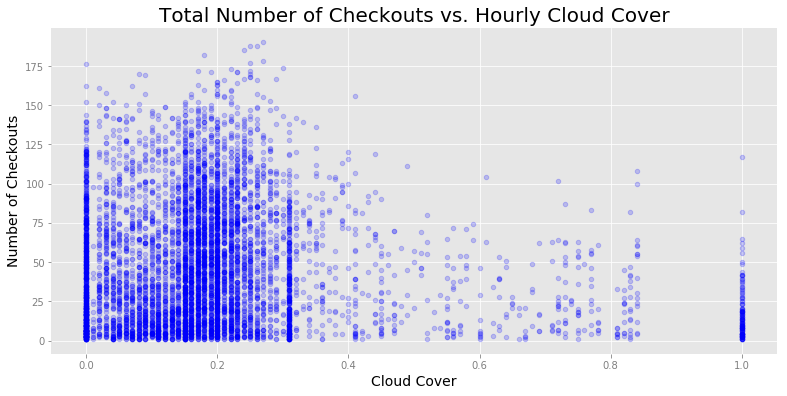

In [165]:
dT.plot(kind='scatter', x='Cloud_Cover', y='Number_Of_Checkouts', alpha=0.2, color='blue', figsize=(13,6))
plt.title('Total Number of Checkouts vs. Hourly Cloud Cover', fontsize = 20)
plt.xlabel('Cloud Cover', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

### Checkouts vs. Hourly Wind Speed

Wind speed significantly impacts ridership. Speeds between 0 and 5 miles per hour are very favorable to renting bikes. Rideship radipdly diminshes at 10 or higher miles per hour.

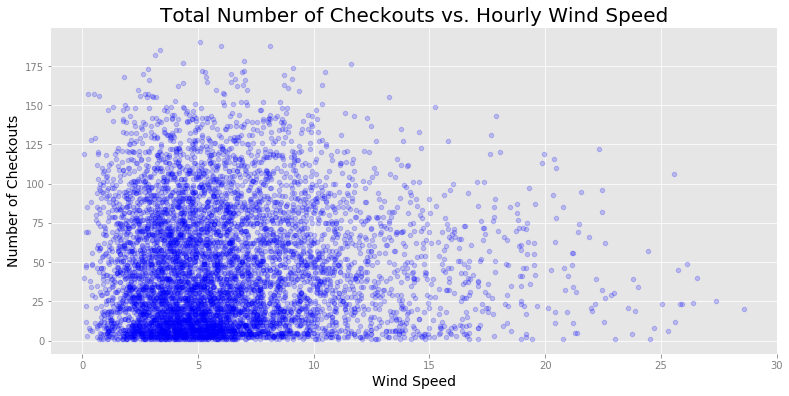

In [166]:
dT.plot(kind='scatter', x='Wind_Speed', y='Number_Of_Checkouts', alpha=0.2, color='blue', figsize=(13,6))
plt.title('Total Number of Checkouts vs. Hourly Wind Speed', fontsize = 20)
plt.xlabel('Wind Speed', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

### Checkouts vs. Hourly Visibility

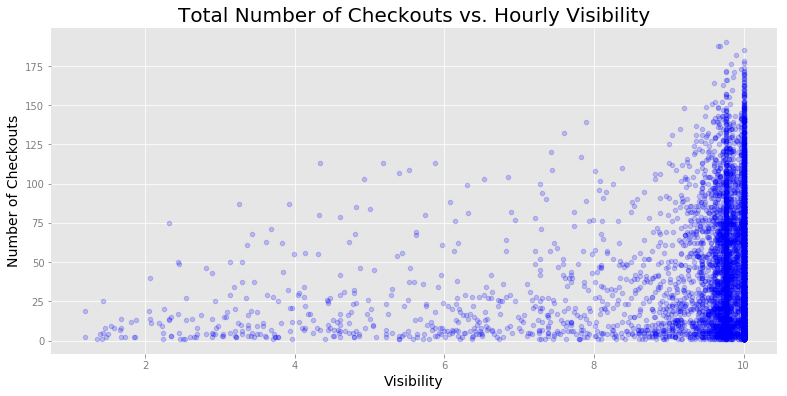

In [167]:
dT.plot(kind='scatter', x='Visibility', y='Number_Of_Checkouts', alpha=0.2, color='blue', figsize=(13,6))
plt.title('Total Number of Checkouts vs. Hourly Visibility', fontsize = 20)
plt.xlabel('Visibility', fontsize = 14)
plt.ylabel('Number of Checkouts', fontsize = 14)
plt.show()

In [168]:
# save csv file in preparation for use in the Machine Learning phase
dF.to_csv("data/Denver_2017_Bike_Share_Trip_ML_Data.gz", index=False, compression="gzip")